# FLIP(04): Learning Theory (I)
**(Module 01: Game Theory)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, but NOT allowed to change or distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---

# Ficititious Play

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import fictplay

In [2]:
reload(fictplay)

<module 'fictplay' from 'fictplay.pyc'>

## Two-Action Games

In [3]:
matching_pennies = [[( 1, -1), (-1,  1)],
                    [(-1,  1), ( 1, -1)]]
fp0 = fictplay.FictitiousPlay(matching_pennies)

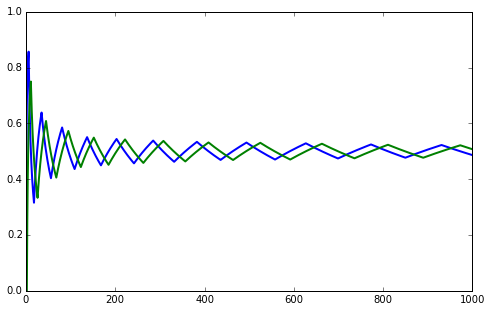

In [4]:
ts_length = 1000
belief_sequences = fp0.simulate(ts_length)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_color_cycle(['b', 'g'])
for belief_sequence in belief_sequences:
    ax.plot(belief_sequence[:, 1], linewidth=2)
ax.set_ylim(0, 1)
plt.show()

## Three-Action Games

In [5]:
def customize_ax(ax):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_xticks((0, 0.25, 0.5, 0.75, 1))
    ax.set_yticks((0.25, 0.5, 0.75))
    ax.set_zticks((0, 0.25, 0.5, 0.75, 1))
    ax.set_aspect('equal')
    ax.view_init(ax.elev, 45)
    
def plot3d(belief_sequences, mult_subplots=False, figsize=(12, 7.5)):
    player_ind = [0, 1]
    fig = plt.figure(figsize=figsize)
    colors = ['b', 'r']
    
    if mult_subplots:
        axes = [fig.add_subplot(1, 2, i+1, projection='3d') for i in player_ind]
    else:
        axes = [fig.add_subplot(111, projection='3d')] * 2
    
    for i, color in zip(player_ind, colors):
        axes[i].scatter(belief_sequences[i][:, 0],
                        belief_sequences[i][:, 1],
                        belief_sequences[i][:, 2],
                        c=color, s=60)
        customize_ax(axes[i])

    plt.show()

In [6]:
shapley_game = [[(1, 0), (0, 0), (0, 1)],
                [(0, 1), (1, 0), (0, 0)],
                [(0, 0), (0, 1), (1, 0)]]
fp1 = fictplay.FictitiousPlay(shapley_game)

In [7]:
ts_length = 1000
belief_sequences = fp1.simulate(ts_length, init_actions=(1, 0))

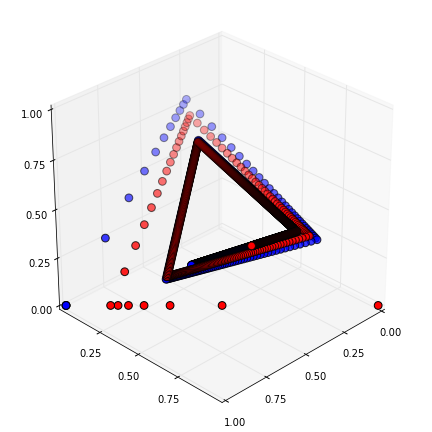

In [8]:
T0 = 0
plot3d((belief_sequences[0][T0:], belief_sequences[1][T0:]))

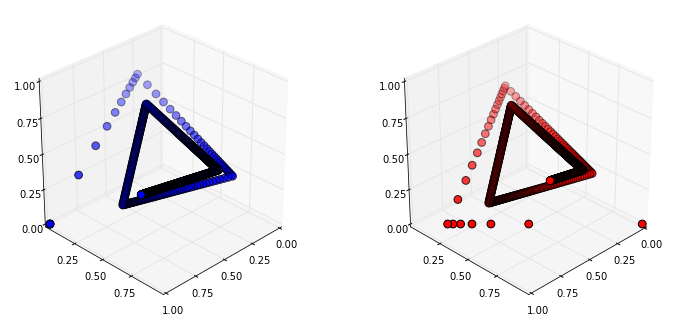

In [9]:
plot3d((belief_sequences[0][T0:], belief_sequences[1][T0:]), mult_subplots=True)